In [1]:
#Exam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Phase 1: Data Collection (e.g., UGRansome dataset)
df2 = pd.read_csv('final(2).csv')
df2
df2.columns = ['Time','Protocol','Flag','Family','Clusters','SeedAddress','ExpAddress','BTC','USD','Netflow_Bytes','IPaddress','Threats','Port','Prediction']
df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,500,5,A,Bonet,5061,SS
1,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
2,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
3,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
4,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149038,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1010,1590,3340,A,Scan,5062,A
149039,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1014,1596,3351,A,Scan,5062,A
149040,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1018,1602,3362,A,Scan,5062,A
149041,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1022,1608,3373,A,Scan,5062,A


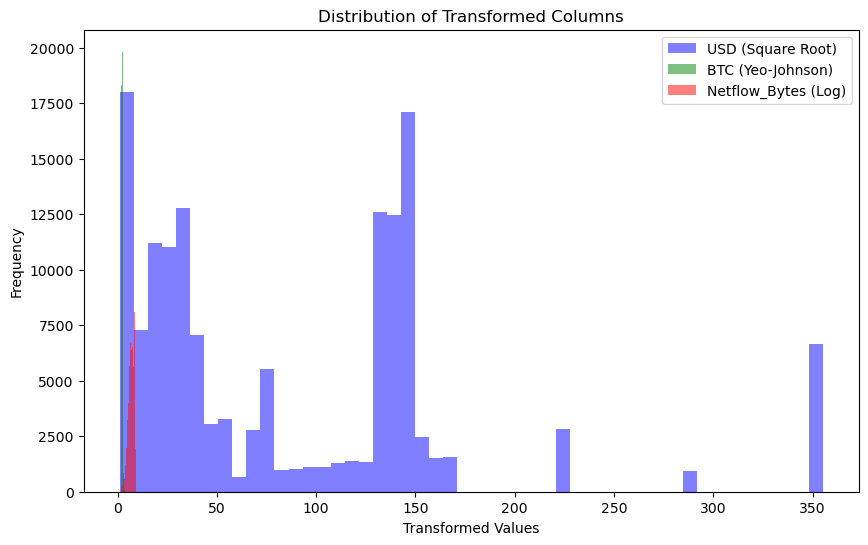

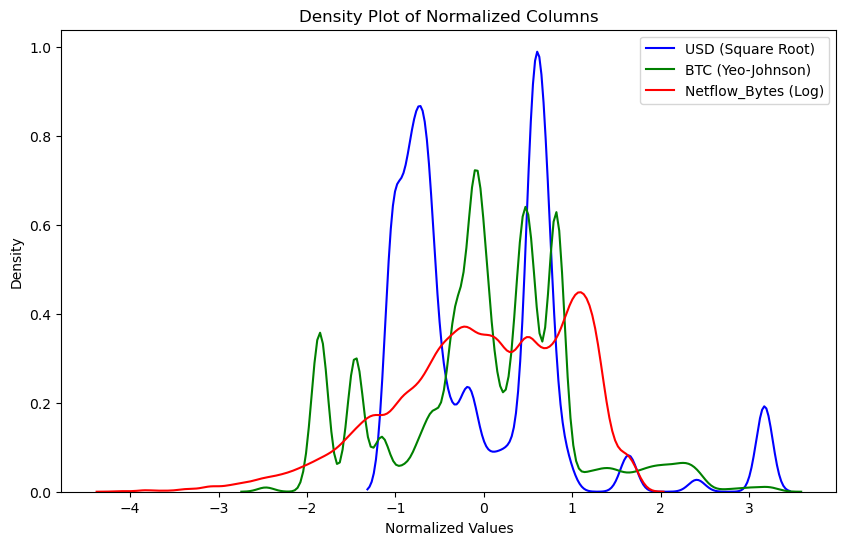

In [2]:
# Data cleaning
# Renaming the attack "Bonet" to "Botnet"
df2['Threats'] = df2['Threats'].str.replace('Bonet', 'Botnet')
# Print the modified DataFrame
df2
# Phase 2: Data Preparation (feature engineering and data transformation)
# --- Drop all duplicate rows --- #
df2 = df2.drop_duplicates()
# --- Remove negative values from time/timestamp feature --- #
df2['Time'] = df2['Time'] + 11
# --- Math transformations to reduce skewness --- #
# --- Log transformation applied to column NETFLOW_BYTES --- #
# A log transformation involves taking the natural logarithm (base e) of each data point in a particular column or feature.
#Logarithmic transformations are often used to reduce the impact of extreme values (outliers) and make the data conform more 
#closely to a normal distribution. They are particularly useful when dealing with positively skewed data, 
#where the tail of the distribution is elongated on the right side.

#The np.log() function is a common way to perform a logarithmic transformation in Python. 
#The + 1 added to the data points is often used to avoid issues with taking the logarithm of zero or negative values. 
#It's a common practice to add a small constant like 1 to the data before applying the logarithm.
#By applying a log transformation to a feature, you're essentially compressing the range of values in that feature, 
#which can help in cases where the data exhibits a rightward skew, making it more suitable for certain types of analysis 
#or modeling techniques that assume normally distributed data.
df2['Netflow_Bytes'] = np.log(df2['Netflow_Bytes']+1)

# --- Square root transformation applied to columns USD ---#

#Square Root Transformation: A square root transformation involves taking the square root of each data point in the 
#specified column. In this case, it's applied to the 'USD' column.
#Square root transformations are a type of mathematical transformation used to mitigate the impact of right-skewed data. 
#Just like logarithmic transformations, square root transformations can help make the data more symmetric and closer to 
#a normal distribution.
#The np.sqrt() function is used to calculate the square root.
#By applying a square root transformation to the 'USD' column, the code is attempting to make the data distribution less skewed 
#and more suitable for certain statistical analyses or modeling techniques that assume normally distributed data or 
#require data to be more symmetric. It's a common technique used in data preprocessing to improve the quality of data for 
#analysis or modeling
df2['USD'] = np.sqrt(df2['USD'])
# --- Yeo Johnson transformation applied to columns BTC--#

#Yeo-Johnson transformation is being applied to the 'BTC' column in the DataFrame (df2['BTC']). 
#This transformation is used to modify the data in the 'BTC' column to make its distribution more normalized or symmetric
#The Yeo-Johnson transformation is a mathematical transformation technique used to modify the distribution of data. 
#It can be applied to both positive and negative values and is more versatile than some other transformations like the Box-Cox transformation.
#The transformation is performed using the stats.yeojohnson() function from a library like SciPy

df2['BTC'], _ = stats.yeojohnson(df2['BTC'])

#--PLOTING TRANSFORMED DATA--#
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the transformed 'USD' column
ax.hist(df2['USD'], bins=50, alpha=0.5, color='blue', label='USD (Square Root)')
# Plot the transformed 'BTC' column
ax.hist(df2['BTC'], bins=50, alpha=0.5, color='green', label='BTC (Yeo-Johnson)')
# Plot the transformed 'Netflow_Bytes' column
ax.hist(df2['Netflow_Bytes'], bins=50, alpha=0.5, color='red', label='Netflow_Bytes (Log)')
# Add labels and a legend
ax.set_xlabel('Transformed Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Transformed Columns')
ax.legend()
# Show the plot
plt.show()


# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))
# Create a StandardScaler instance
# The StandardScaler is a common preprocessing technique used in machine learning and data analysis. 
#It is used to standardize or normalize the features of a dataset by scaling them such that they have a mean of 0 and a standard
#deviation of 1.

#Standardizing the features is useful because it makes different features more directly comparable, especially in algorithms 
#that are sensitive to the scale of the input data, such as many machine learning algorithms.
#In the code provided, scaler is created as an instance of the StandardScaler class, which can then be used to standardize 
#the specified columns in the df2 DataFrame using the fit_transform method, as seen in the subsequent code
scaler = StandardScaler()
# Normalize each column's features
df2_normalized = df2.copy()
df2_normalized[['USD', 'BTC', 'Netflow_Bytes']] = scaler.fit_transform(df2[['USD', 'BTC', 'Netflow_Bytes']])
# Plot the density of the normalized 'USD' column
sns.kdeplot(df2_normalized['USD'], color='blue', label='USD (Square Root)', ax=ax)
# Plot the density of the normalized 'BTC' column
sns.kdeplot(df2_normalized['BTC'], color='green', label='BTC (Yeo-Johnson)', ax=ax)
# Plot the density of the normalized 'Netflow_Bytes' column
sns.kdeplot(df2_normalized['Netflow_Bytes'], color='red', label='Netflow_Bytes (Log)', ax=ax)
# Add labels and a legend
ax.set_xlabel('Normalized Values')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Normalized Columns')
ax.legend()
# Show the plot
plt.show()

In [3]:
#The preprocessing module in scikit-learn provides various tools and techniques for preprocessing your data before 
#feeding it into machine learning models. 
#This preprocessing is crucial to improve the quality of your data and the performance of your models.
from sklearn import preprocessing #pip install scikit-learn
#The code segment uses scikit-learn's LabelEncoder to transform categorical variables into numerical values. 
#Each categorical column, such as 'Protocol,' 'Flag,' 'Family,' 'SeedAddress,' 'ExpAddress,' 'IPaddress,' 'Threats,' and 
#'Prediction,' is encoded into unique numeric labels. 
#This preprocessing step is essential for machine learning algorithms, as they typically require numerical input data 
#instead of categorical labels.

lab_encoder = preprocessing.LabelEncoder()                     # transformation of categorical to numeric
df2['Protocol'] = lab_encoder.fit_transform(df2['Protocol'])
df2['Flag'] = lab_encoder.fit_transform(df2['Flag'])
df2['Family'] = lab_encoder.fit_transform(df2['Family'])
df2['SeedAddress'] = lab_encoder.fit_transform(df2['SeedAddress'])
df2['ExpAddress'] = lab_encoder.fit_transform(df2['ExpAddress'])
df2['IPaddress'] = lab_encoder.fit_transform(df2['IPaddress'])
df2['Threats'] = lab_encoder.fit_transform(df2['Threats'])
df2['Prediction'] = lab_encoder.fit_transform(df2['Prediction'])
df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,61,1,0,16,1,2,2,0.645909,22.360680,1.791759,0,1,5061,2
1,51,1,0,16,1,2,2,0.645909,22.449944,2.197225,0,1,5061,2
2,41,1,0,16,1,2,2,0.645909,22.538855,2.079442,0,1,5061,2
3,31,1,0,16,1,2,2,0.645909,22.627417,2.772589,0,1,5061,2
4,68,1,0,16,1,2,2,0.645909,22.715633,2.302585,0,1,5061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149038,44,2,2,15,3,1,6,3.686013,39.874804,8.114025,0,6,5062,0
149039,44,2,2,15,3,1,6,3.686961,39.949969,8.117312,0,6,5062,0
149040,44,2,2,15,3,1,6,3.687905,40.024992,8.120589,0,6,5062,0
149041,44,2,2,15,3,1,6,3.688844,40.099875,8.123854,0,6,5062,0


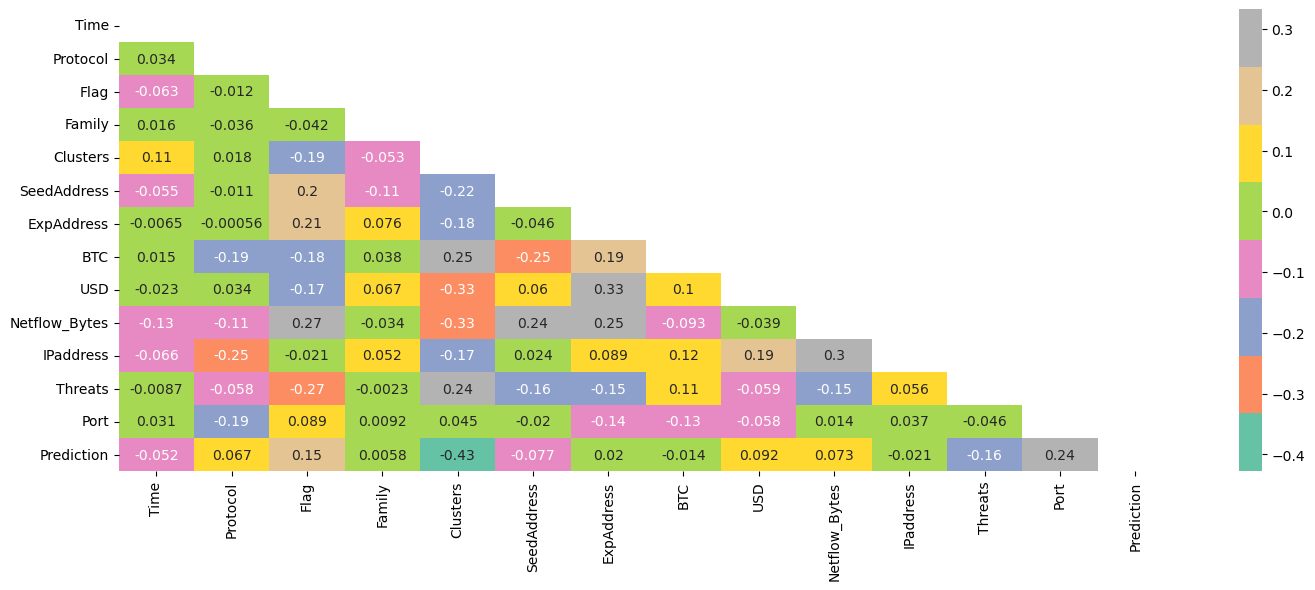

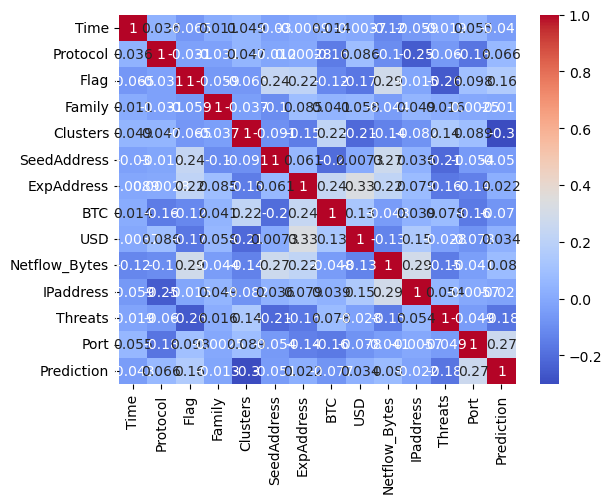

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# df2 is your dataframe
plt.figure(figsize=(17, 6))
corr = df2.corr(method='spearman')
my_m = np.triu(corr)
sns.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [5]:
#The train_test_split function from scikit-learn is used to split a dataset into two subsets: 
#a training set and a testing (or validation) set. This function is commonly employed in machine learning 
#to assess the performance of a model on unseen data. It takes as input the dataset, typically represented as features (X) 
#and labels (y), and divides it into training data (X_train and y_train) used to train the model and 
#testing data (X_test and y_test) used to evaluate the model's performance.

from sklearn.model_selection import train_test_split  # library for machine learning models 


#common procedure in machine learning for splitting a dataset into training and testing sets using the train_test_split function
#from scikit-learn. Here's a breakdown of what each line of code does:

X = df2.iloc[:, :-1] #This line selects all rows and all columns of the DataFrame df2 except for the last column. 
#It's assuming that the last column contains the target variable or labels, and X will contain all the feature columns

y = df2.iloc[:, -1]  # This line selects all rows but only the last column of the DataFrame df2. 
#This is to isolate the target variable or labels, and y will contain these labels.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)  #split test and train into 4 parts
#This line uses the train_test_split function to split the data into training and testing sets. 
#Here's a breakdown of the parameters:

#X and y: The feature matrix and target variable.
#train_size=0.8: This parameter specifies that 80% of the data should be used for training 
#(you can adjust this percentage as needed).
#random_state=42: This parameter sets the random seed for reproducibility, ensuring that the split is the same each time you 
#run the code.


#After running this code, you will have:

#X_train: The feature matrix for training.
#X_test: The feature matrix for testing.
#y_train: The target variable for training.
#y_test: The target variable for testing.
#These subsets can then be used for training and evaluating your machine learning models.

In [6]:
X_train
X_test
y_train
y_test

42916     1
45544     2
137525    0
108170    1
85804     2
         ..
91256     1
132188    1
94999     2
3431      0
147946    0
Name: Prediction, Length: 29809, dtype: int32

In [7]:
#The %%time command is typically used in Jupyter Notebook environments, such as Jupyter Notebook or JupyterLab. 
#It is called a "magic command" and is used to measure the execution time of a specific code cell. 
#When you include %%time at the beginning of a cell, it tells Jupyter to measure the time it takes to run the code within 
#that cell
#%%time


# Import various libraries and tools for building and evaluating machine learning models in Python
# Imported models: ensemble, random forest, SVM, Naive Bayes, genetic algorithm
# Imported evaluation metrics: accuracy, precision, recall, f1 score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.ensemble import StackingClassifier #ensmbl method of stacking classify for ensmbling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 


from sklearn.tree import DecisionTreeClassifier   #estimator in GA
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42) #  It specifies the number of trees in the Random Forest. 
#In this case, there are 100 trees in the forest

# random_state: This parameter is used to set the random seed for reproducibility. 
#By setting it to 42, the randomization process will be the same each time the code is run,
#ensuring consistent results for the Random Forest model.

rf.fit(X_train, y_train)

rf_pred=rf.predict(X_test)

#This code snippet uses the trained Random Forest classifier (rf) to make predictions on the test data (X_test). 
#The predict method takes the test features in X_test as input and produces predicted labels for these features. 
#The predictions are stored in the rf_pred variable, which can be used for further evaluation or analysis to assess how well 
#the model performs on unseen data.



rf_accuracy = accuracy_score(rf_pred, y_test)
rf_report = classification_report(rf_pred, y_test)
rf_matrix = confusion_matrix(rf_pred, y_test)
print('Accuracy of Random Forest : ', round(rf_accuracy, 3))
print('Classification report of Random Forest : \n', rf_report)
print('Confusion Matrix of Random Forest : \n', rf_matrix)




#The accuracy_score function from scikit-learn is used to calculate the accuracy of the model's predictions (rf_pred) 
#compared to the actual labels (y_test). This score measures the proportion of correctly classified instances.
#classification_report: The classification_report function generates a comprehensive report that includes precision, recall, 
#F1-score, and support for each class in the classification problem. It provides detailed insights into the model's 
#performance for different classes.
#confusion_matrix: The confusion_matrix function computes a confusion matrix that summarizes the true positive, true negative, 
#false positive, and false negative counts for the classification results. It helps in understanding how well the model is 
#performing and where it might be making errors.

#Finally, the code prints out the accuracy, classification report, and confusion matrix for the Random Forest model, 
#allowing you to evaluate its performance on the test data.

Accuracy of Random Forest :  0.994
Classification report of Random Forest : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8400
           1       0.99      0.99      0.99     13359
           2       1.00      0.99      0.99      8050

    accuracy                           0.99     29809
   macro avg       0.99      0.99      0.99     29809
weighted avg       0.99      0.99      0.99     29809

Confusion Matrix of Random Forest : 
 [[ 8346    49     5]
 [   49 13280    30]
 [    8    44  7998]]


In [9]:
svr = LinearSVC()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)



#a Support Vector Machine (SVM) classifier with a linear kernel (LinearSVC) is trained and tested using the following steps:

#svr = LinearSVC(): An instance of the LinearSVC classifier is created.

#svr.fit(X_train, y_train): The LinearSVC classifier is trained on the training data (X_train and y_train). 
#This step involves finding the hyperplane that best separates the data points of different classes while maximizing the margin
#between them.

#svr_pred = svr.predict(X_test): The trained SVM classifier is used to make predictions on the test data (X_test). 
#These predictions are stored in the svr_pred variable.




svr_accuracy = accuracy_score(svr_pred, y_test)
svr_report = classification_report(svr_pred, y_test)
svr_matrix = confusion_matrix(svr_pred, y_test)
print('Accuracy of SVM : ', round(svr_accuracy, 3))
print('Classification report of SVM : \n', svr_report)
print('Confusion Matrix of SVM :\n', svr_matrix)







#svr_accuracy = accuracy_score(svr_pred, y_test): The accuracy of the SVM classifier's predictions on the test data (svr_pred) 
#is calculated by comparing them to the true labels (y_test). The result is stored in the svr_accuracy variable.

#svr_report = classification_report(svr_pred, y_test): The classification_report function is used to generate a detailed 
#classification report, including metrics such as precision, recall, F1-score, and support for each class. 
#This report is stored in the svr_report variable.

#svr_matrix = confusion_matrix(svr_pred, y_test): The confusion matrix is computed based on the predictions (svr_pred) and 
#true labels (y_test). The confusion matrix provides information about the number of true positive, true negative, 
#false positive, and false negative predictions. It is stored in the svr_matrix variable.

#Finally, the results are printed using print statements:

#The accuracy of the SVM classifier is printed with a rounded value.
#The classification report, which includes precision, recall, F1-score, and support for each class, is printed.
#The confusion matrix, which shows the distribution of true and false predictions, is printed.
#These metrics help evaluate the performance of the SVM classifier in terms of its ability to correctly classify data points into different classes.

Accuracy of SVM :  0.751
Classification report of SVM : 
               precision    recall  f1-score   support

           0       0.59      0.71      0.65      6993
           1       0.88      0.84      0.86     14013
           2       0.71      0.64      0.67      8803

    accuracy                           0.75     29809
   macro avg       0.73      0.73      0.73     29809
weighted avg       0.76      0.75      0.75     29809

Confusion Matrix of SVM :
 [[ 4995   590  1408]
 [ 1329 11729   955]
 [ 2079  1054  5670]]


Accuracy of Naive Bayes :  0.777
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.64      0.67      0.66      7993
           1       0.86      0.88      0.87     13191
           2       0.78      0.72      0.75      8625

    accuracy                           0.78     29809
   macro avg       0.76      0.76      0.76     29809
weighted avg       0.78      0.78      0.78     29809

Confusion Matrix of Naive Bayes :
 [[ 5380  1357  1256]
 [ 1109 11543   539]
 [ 1914   473  6238]]
Accuracy of Naive Bayes :  0.777
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.64      0.67      0.66      7993
           1       0.86      0.88      0.87     13191
           2       0.78      0.72      0.75      8625

    accuracy                           0.78     29809
   macro avg       0.76      0.76      0.76     29809
weighted avg       0.78      0.78      0.78   

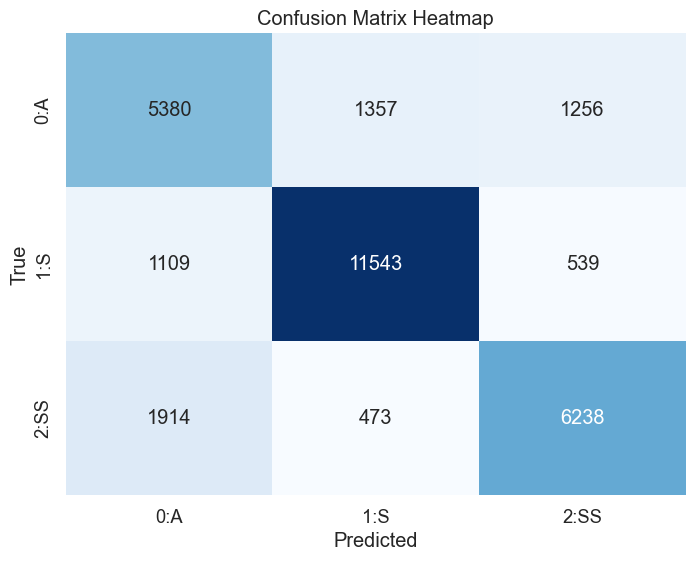

In [10]:
#Naive Bayes Algorithm

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)


nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test)
nb_matrix = confusion_matrix(nb_pred, y_test)
print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', nb_report)
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)




# Assuming you already have nb_pred and y_test defined

nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test)
nb_matrix = confusion_matrix(nb_pred, y_test)

print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', nb_report)
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()




Accuracy of Naive Bayes :  0.777
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.64      0.67      0.66      7993
           1       0.86      0.88      0.87     13191
           2       0.78      0.72      0.75      8625

    accuracy                           0.78     29809
   macro avg       0.76      0.76      0.76     29809
weighted avg       0.78      0.78      0.78     29809

Confusion Matrix of Naive Bayes :
 [[ 5380  1357  1256]
 [ 1109 11543   539]
 [ 1914   473  6238]]


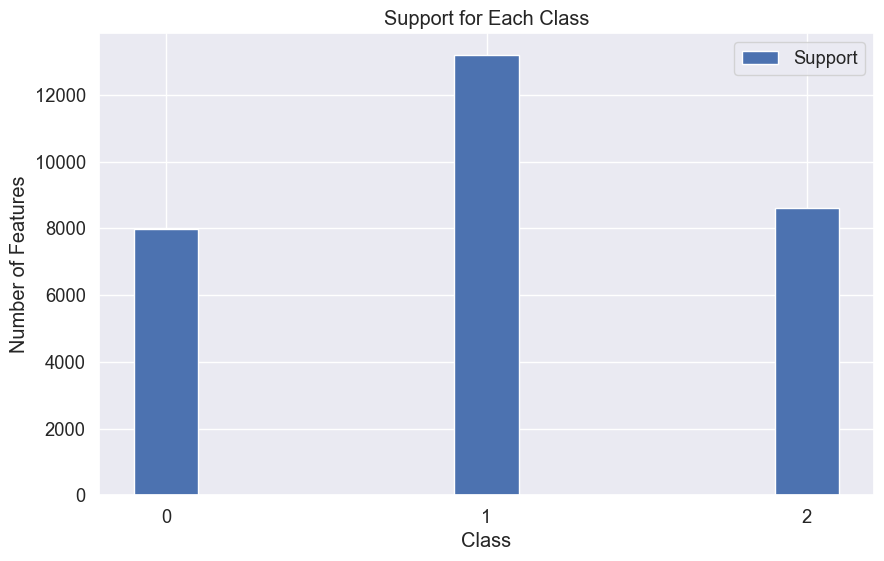

In [11]:
# Assuming you already have nb_pred and y_test defined

nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test, output_dict=True)  # Use output_dict=True to get metrics as a dictionary
nb_matrix = confusion_matrix(nb_pred, y_test)

# Extract support for all classes
labels = [str(label) for label in np.unique(np.concatenate((nb_pred, y_test)))]  # Get all unique labels
support = [nb_report[label]['support'] if label in nb_report else 0 for label in labels]

print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', classification_report(nb_pred, y_test))
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)

# Plot support
plt.figure(figsize=(10, 6))
plt.bar(labels, support, width=0.2, label='Support', align='center')

plt.xlabel('Class')
plt.ylabel('Number of Features')
plt.xticks(labels)
plt.legend()
plt.title('Support for Each Class')
plt.show()

Accuracy of Naive Bayes :  0.777
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.64      0.67      0.66      7993
           1       0.86      0.88      0.87     13191
           2       0.78      0.72      0.75      8625

    accuracy                           0.78     29809
   macro avg       0.76      0.76      0.76     29809
weighted avg       0.78      0.78      0.78     29809



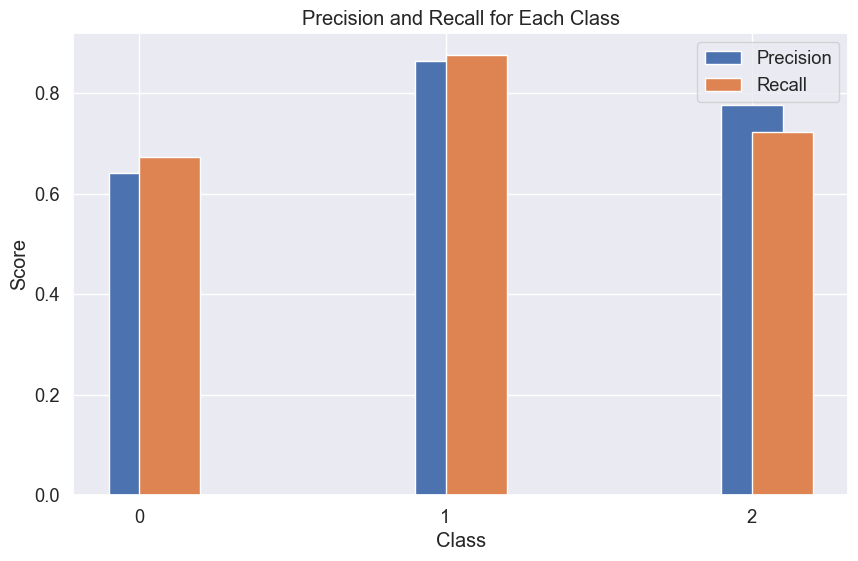

In [12]:
# Assuming you already have nb_pred and y_test defined

nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test, output_dict=True)  # Use output_dict=True to get metrics as a dictionary
nb_matrix = confusion_matrix(nb_pred, y_test)

# Extract precision and recall for all classes
labels = [str(label) for label in np.unique(np.concatenate((nb_pred, y_test)))]  # Get all unique labels
precision = [nb_report[label]['precision'] if label in nb_report else 0.0 for label in labels]
recall = [nb_report[label]['recall'] if label in nb_report else 0.0 for label in labels]

print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', classification_report(nb_pred, y_test))

# Plot precision and recall
plt.figure(figsize=(10, 6))
plt.bar(labels, precision, width=0.2, label='Precision', align='center')
plt.bar(labels, recall, width=0.2, label='Recall', align='edge')

plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(labels)
plt.legend()
plt.title('Precision and Recall for Each Class')
plt.show()

In [32]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=42)),
    ('svr', LinearSVC(random_state=42))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB())



#In this code snippet, a Stacking Classifier (clf) is defined using scikit-learn's StackingClassifier. 
#Stacking is an ensemble learning method that combines multiple base estimators to improve predictive performance.

#Here's a breakdown of the code:

#estimators: This is a list of tuples, where each tuple contains the name of the estimator and the estimator object. 
#Two base estimators are defined:

#'rf': A Random Forest Classifier with 1000 estimators and a random seed of 42.
#'svr': A Linear Support Vector Classifier (LinearSVC) with a random seed of 42.
#clf: The Stacking Classifier is created using the StackingClassifier class. It takes two main parameters:

#estimators: This parameter receives the list of base estimators defined earlier.
#final_estimator: This parameter specifies the meta-estimator that combines the predictions from the base estimators. 
#In this case, a Gaussian Naive Bayes (GaussianNB) classifier is used as the final estimator.
#The Stacking Classifier combines the predictions of the base classifiers ('rf' and 'svr') using the final estimator (GaussianNB)
#This ensemble method can often improve classification performance by leveraging the strengths of multiple classifiers.


In [14]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)




#In this code snippet, the Stacking Classifier (clf) is trained on the training data (X_train and y_train) using the fit method. 
#After training, the classifier is used to make predictions on the test data (X_test) using the predict method. 
#Finally, the accuracy of the predictions is calculated using scikit-learn's accuracy_score function and stored in the variable accuracy.

#The code essentially performs the following steps:

#Trains the Stacking Classifier (clf) using the training data.
#Uses the trained classifier to predict the target labels for the test data.
#Calculates the accuracy of the predictions by comparing them to the true labels (y_test).
#The accuracy variable will contain the accuracy score of the Stacking Classifier's predictions on the test data. 
#This score measures how well the classifier performed in terms of correctly classifying the data points in the test set.

Accuracy of Ensemble Model :  0.994
Confusion Matrix of Ensemble Model :  [[ 8350    49     6]
 [   47 13282    32]
 [    6    42  7995]]
Classification Report of Ensemble Model :               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8405
           1       0.99      0.99      0.99     13361
           2       1.00      0.99      0.99      8043

    accuracy                           0.99     29809
   macro avg       0.99      0.99      0.99     29809
weighted avg       0.99      0.99      0.99     29809

Accuracy of Ensemble Model :  0.994
Confusion Matrix of Ensemble Model : 
 [[ 8350    49     6]
 [   47 13282    32]
 [    6    42  7995]]
Classification Report of Ensemble Model :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8405
           1       0.99      0.99      0.99     13361
           2       1.00      0.99      0.99      8043

    accuracy                           

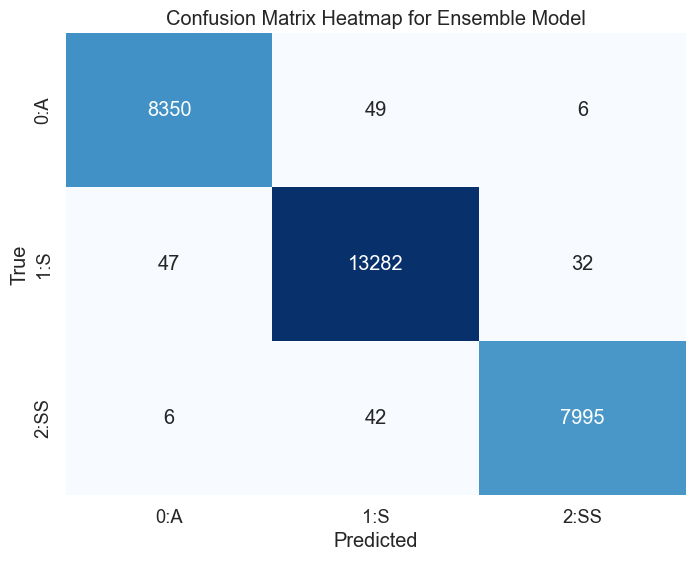

In [15]:
eb_accuracy = accuracy_score(pred, y_test)
eb_matrix = confusion_matrix(pred, y_test)
eb_report = classification_report(pred, y_test)

print('Accuracy of Ensemble Model : ', round(eb_accuracy, 3))
print('Confusion Matrix of Ensemble Model : ', eb_matrix)
print('Classification Report of Ensemble Model :', eb_report)


#In this code snippet, the accuracy, confusion matrix, and classification report for the ensemble model (clf) are evaluated 
#and printed.

#Here's what each part of the code does:

#eb_accuracy: Calculates the accuracy of the ensemble model's predictions by comparing them to the true labels (y_test) 
#using the accuracy_score function.
#eb_matrix: Computes the confusion matrix for the ensemble model's predictions using the confusion_matrix function. 
#The confusion matrix provides information about the true positives, true negatives, false positives, and false negatives.
#eb_report: Generates a classification report for the ensemble model's predictions using the classification_report function. 
#The classification report includes metrics such as precision, recall, F1-score, and support for each class.
#Finally, the code prints out the accuracy, confusion matrix, and classification report for the ensemble model. 
#These metrics provide insights into the model's performance in terms of classification accuracy and the ability to correctly 
#classify different classes.

# Assuming you already have pred and y_test defined for your Ensemble Model

eb_accuracy = accuracy_score(pred, y_test)
eb_matrix = confusion_matrix(pred, y_test)
eb_report = classification_report(pred, y_test)

print('Accuracy of Ensemble Model : ', round(eb_accuracy, 3))
print('Confusion Matrix of Ensemble Model : \n', eb_matrix)
print('Classification Report of Ensemble Model :\n', eb_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(eb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap for Ensemble Model")
plt.show()





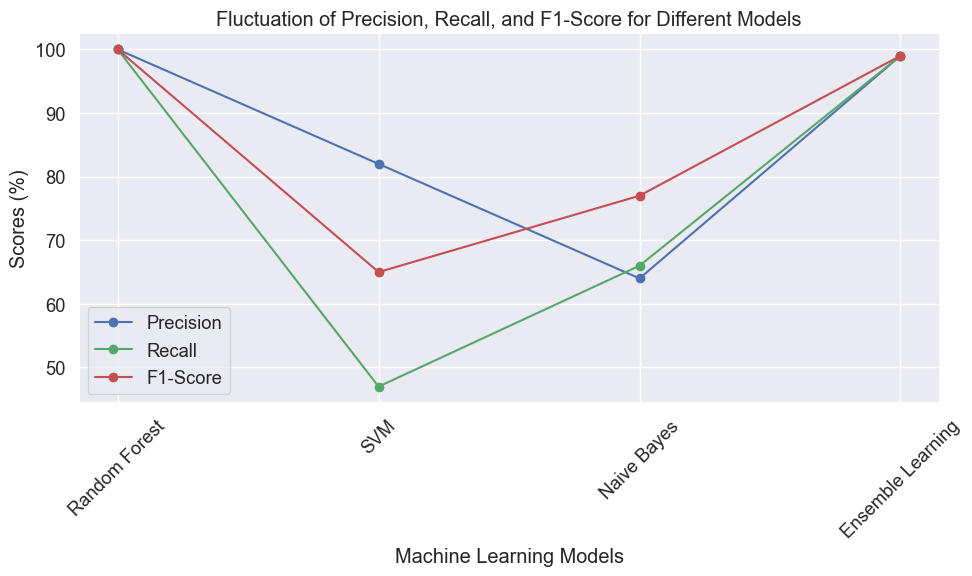

In [16]:
#Plot the evaluation metrics of each model in one figure

# Model names
models = ['Random Forest', 'SVM', 'Naive Bayes', 'Ensemble Learning']

# Precision scores
precision = [100, 82, 64, 99]

# Recall scores
recall = [100, 47, 66, 99]

# F1-score scores
f1_score = [100, 65, 77, 99]

# X-axis values (models)
x = range(len(models))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot precision scores
ax.plot(x, precision, marker='o', linestyle='-', color='b', label='Precision')

# Plot recall scores
ax.plot(x, recall, marker='o', linestyle='-', color='g', label='Recall')

# Plot F1-score scores
ax.plot(x, f1_score, marker='o', linestyle='-', color='r', label='F1-Score')

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.set_xlabel('Machine Learning Models')

# Set y-axis label
ax.set_ylabel('Scores (%)')

# Set plot title
ax.set_title('Fluctuation of Precision, Recall, and F1-Score for Different Models')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()

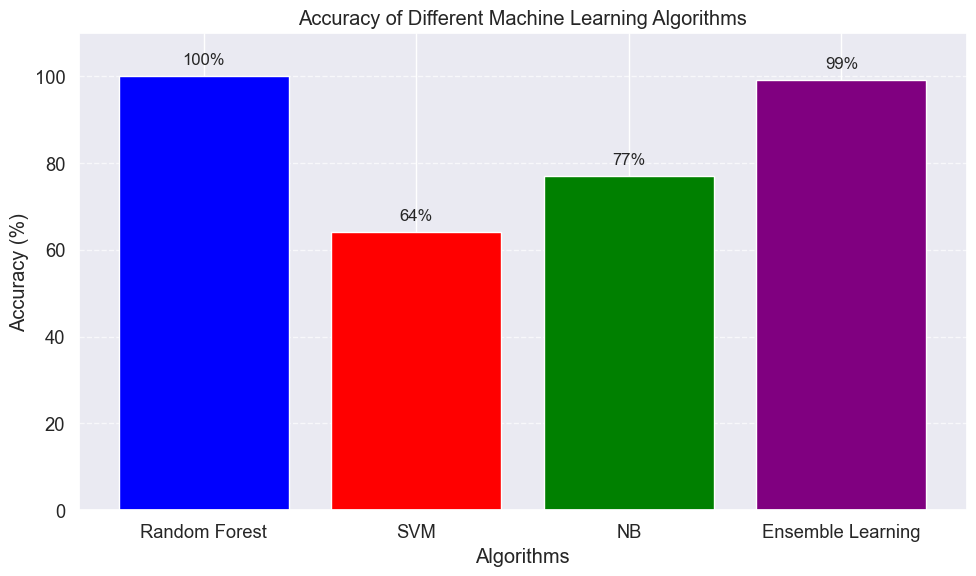

In [17]:
# Define the algorithms and their corresponding accuracies
algorithms = ['Random Forest', 'SVM', 'NB', 'Ensemble Learning']
accuracies = [100, 64, 77, 99]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'red', 'green', 'purple'])
plt.ylim(0, 110)  # Set the y-axis limit for better visualization
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 2, str(v) + '%', ha='center', va='bottom', fontsize=12)

# Show the graph
plt.tight_layout()
plt.show()